In [2]:
import os

import tensorflow as tf
from tensorflow import keras

In [ ]:
keras.datasets.fashion

In [13]:
cur = os.path.dirname(__name__)
img_dataset = os.path.join(cur, '../Img_dataset/train')

In [132]:
dataset = keras.utils.image_dataset_from_directory(
    img_dataset, color_mode='grayscale', validation_split=0.2, subset='both', 
    image_size=(28, 28), batch_size=None, seed=123
)

Found 22566 files belonging to 80 classes.
Using 18053 files for training.
Using 4513 files for validation.


In [133]:
train_ds, val_ds = dataset

In [134]:
class_names = train_ds.class_names
print(class_names[:10])

['Bear', 'Brown Bear', 'Bull', 'Butterfly', 'Camel', 'Canary', 'Caterpillar', 'Cattle', 'Centipede', 'Cheetah']


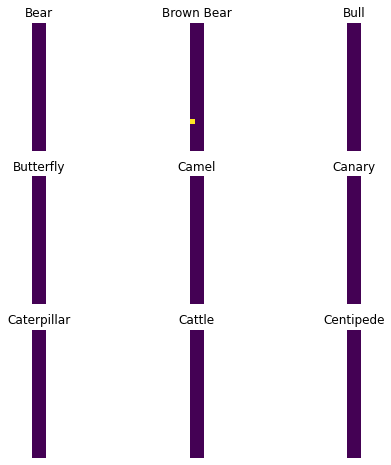

In [131]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

for image, label in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[i])
        plt.axis('off')

In [135]:
for image_batches, label_batches in train_ds:
    print(image_batches.shape)
    print(label_batches.shape)
    break

(28, 28, 1)
()


In [136]:
normalization = keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization(x), y))

In [137]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(500, activation='relu'))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(80, activation='softmax'))

In [138]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 500)               392500    
                                                                 
 dense_25 (Dense)            (None, 300)               150300    
                                                                 
 dense_26 (Dense)            (None, 80)                24080     
                                                                 
Total params: 566880 (2.16 MB)
Trainable params: 566880 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [139]:
model.layers

In [73]:
model.layers[1].name

'dense_3'

In [74]:
model.get_layer('dense_3').name

'dense_3'

In [76]:
weights, biases = model.layers[1].get_weights()
weights

array([[ 0.00854491,  0.05239177,  0.05482531, ..., -0.01905732,
         0.0369537 ,  0.01949956],
       [ 0.00568639, -0.05457355, -0.04818971, ...,  0.00068386,
         0.03554472, -0.01009228],
       [-0.01352502,  0.04238866, -0.00578271, ...,  0.00818123,
         0.05111705,  0.00346006],
       ...,
       [ 0.05180632,  0.02022829, -0.03474454, ...,  0.02497867,
        -0.00884422,  0.03462933],
       [-0.03967797,  0.00518363, -0.01295888, ...,  0.05794928,
        -0.05874532, -0.05416405],
       [ 0.03510082,  0.06588351,  0.02305633, ..., -0.03491399,
         0.03989132, -0.06109415]], dtype=float32)

In [77]:
weights.shape

(784, 500)

In [79]:
biases.shape

(500,)

In [140]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [141]:
history = model.fit(train_ds, epochs=10,
                    validation_data=val_ds)

Epoch 1/10


ValueError: in user code:

    File "/home/riri/Desktop/Tensorflow/venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/home/riri/Desktop/Tensorflow/venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/riri/Desktop/Tensorflow/venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/home/riri/Desktop/Tensorflow/venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/home/riri/Desktop/Tensorflow/venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/riri/Desktop/Tensorflow/venv/lib/python3.10/site-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_17' (type Sequential).
    
    Input 0 of layer "dense_24" is incompatible with the layer: expected axis -1 of input shape to have value 784, but received input with shape (28, 28)
    
    Call arguments received by layer 'sequential_17' (type Sequential):
      • inputs=tf.Tensor(shape=(28, 28, 1), dtype=float32)
      • training=True
      • mask=None
